In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data = pd.read_csv("train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
print("Total Passengers =",len(data))

Total Passengers = 891


<AxesSubplot:xlabel='Survived', ylabel='count'>

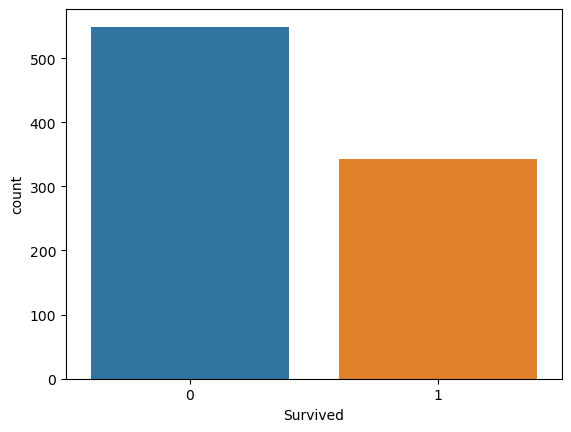

In [4]:
sns.countplot(x='Survived',data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

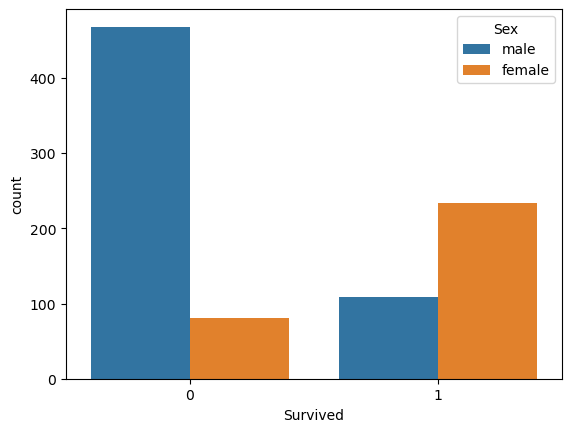

In [5]:
sns.countplot(x="Survived",hue='Sex',data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

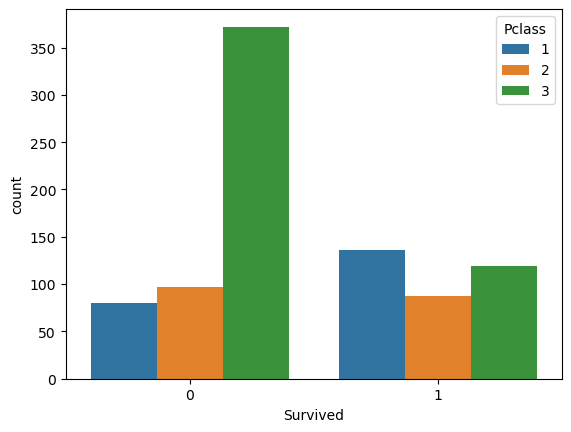

In [6]:
sns.countplot(x='Survived',hue='Pclass',data=data)

<AxesSubplot:ylabel='Frequency'>

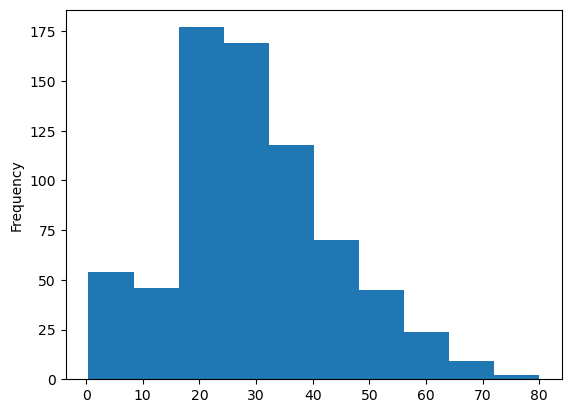

In [7]:
data.Age.plot.hist()

<AxesSubplot:xlabel='Survived', ylabel='count'>

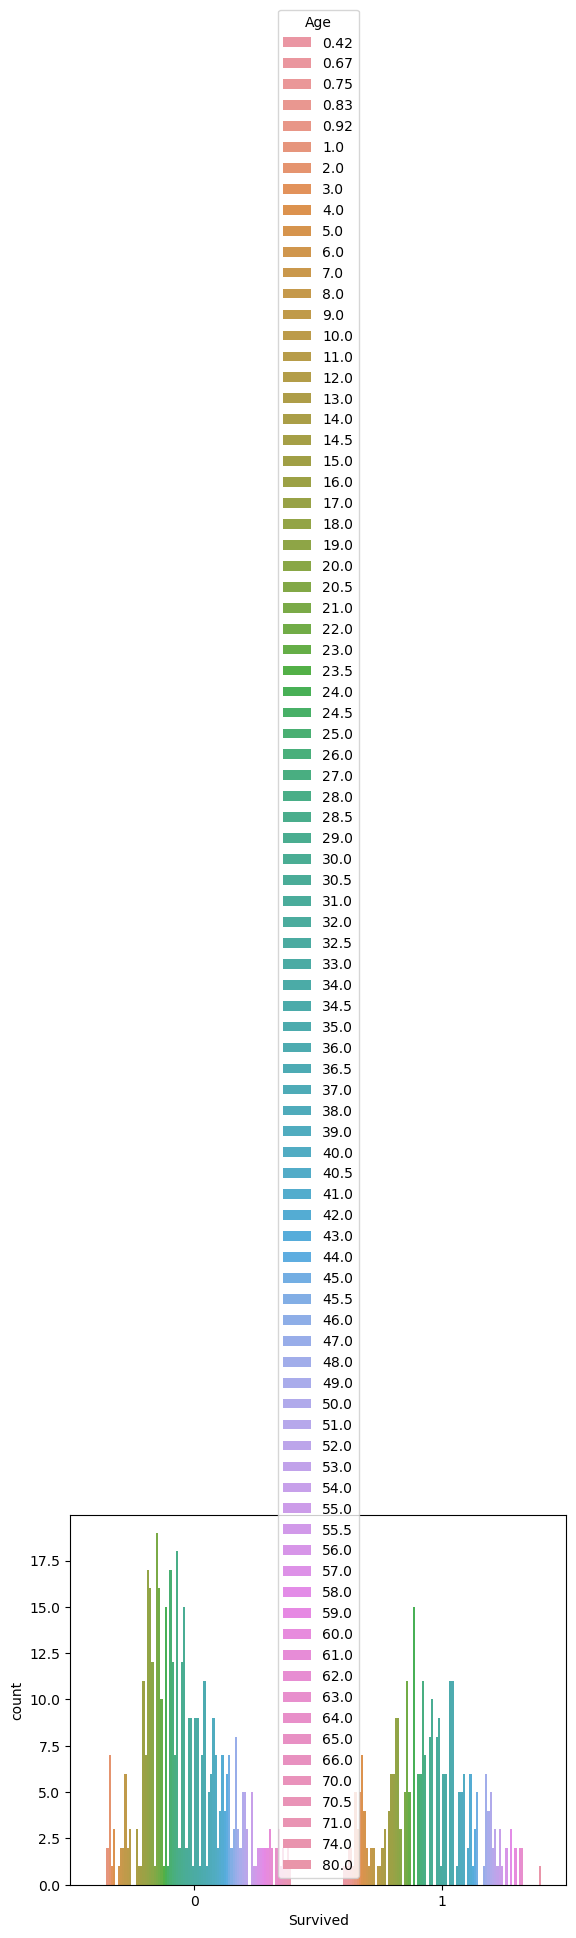

In [8]:
sns.countplot(x="Survived",hue='Age',data=data)

<AxesSubplot:ylabel='Frequency'>

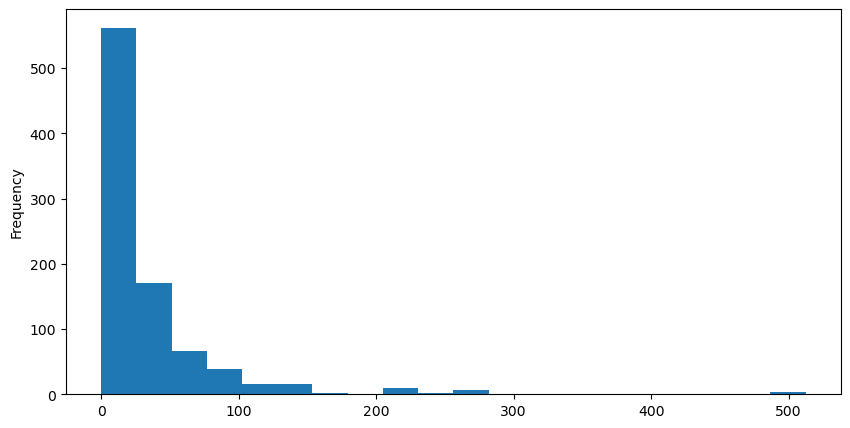

In [9]:
data.Fare.plot.hist(bins=20,figsize=(10,5))

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Object means 1 or more datatypes

<AxesSubplot:xlabel='SibSp', ylabel='count'>

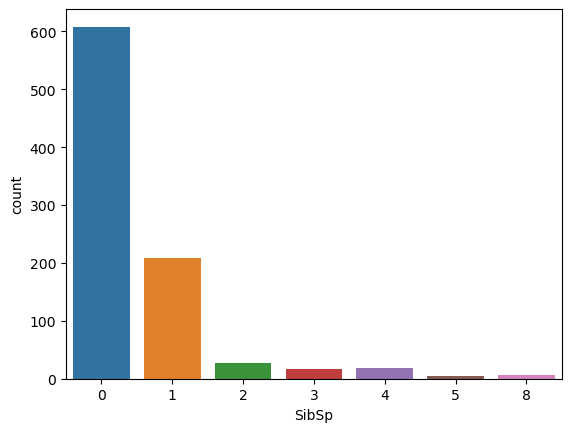

In [11]:
sns.countplot(x='SibSp',data=data)

<AxesSubplot:xlabel='Parch', ylabel='count'>

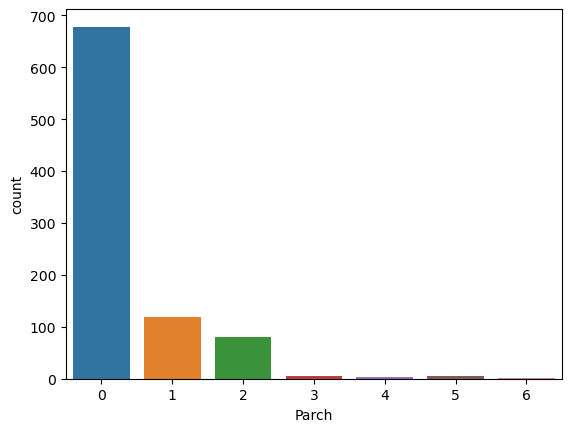

In [12]:
sns.countplot(x='Parch',data=data)

In [13]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

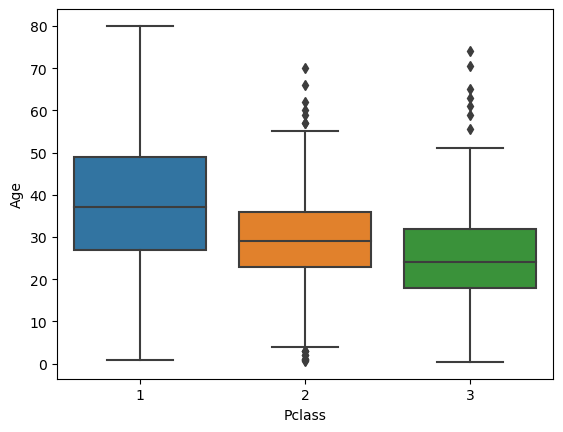

In [14]:
sns.boxplot(x='Pclass',y='Age',data=data)

<AxesSubplot:>

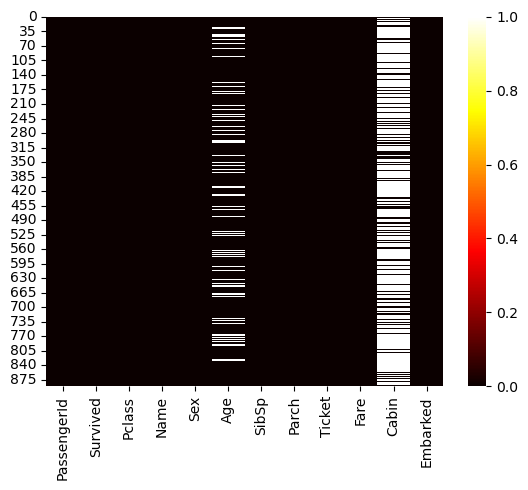

In [15]:
sns.heatmap(data.isnull(),cmap='hot') # Heat map

In [16]:
def missing_age(cols):
    age = cols[0]
    passenger_class = cols[1]
    if pd.isnull(age) == 1:
        if passenger_class == 1:
            return data[data['Pclass']==1]['Age'].mean()
        elif passenger_class == 2:
            return data[data['Pclass']==2]['Age'].mean()
        elif passenger_class == 3:
            return data[data['Pclass']==3]['Age'].mean()
    else:
        return age

In [17]:
data['Age'] = data[['Age','Pclass']].apply(missing_age,axis=1)

In [18]:
print(data.Age)

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Name: Age, Length: 891, dtype: float64


<AxesSubplot:>

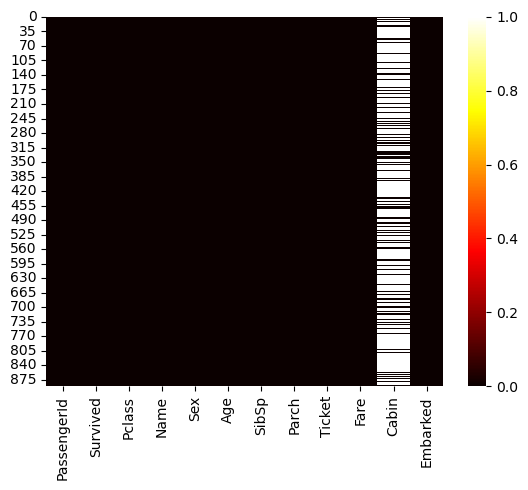

In [19]:
sns.heatmap(data.isnull(),cmap='hot')

In [20]:
 data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
data.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

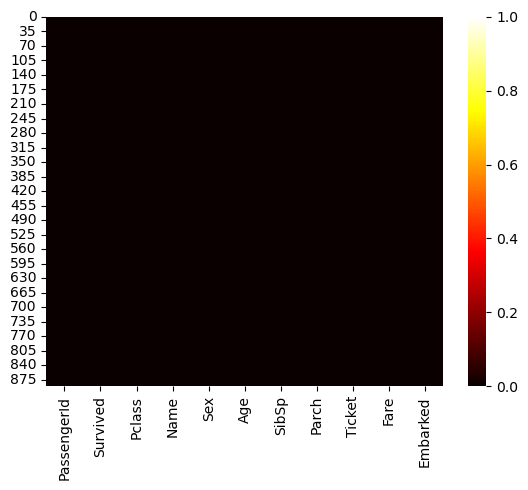

In [22]:
sns.heatmap(data.isnull(),cmap='hot') # No NaN values

In [23]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [24]:
data.dropna(inplace=True)

In [25]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [26]:
pd.get_dummies(data.Sex)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [27]:
sex=pd.get_dummies(data.Sex,drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [28]:
embark = pd.get_dummies(data.Embarked,drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [29]:
pclass = pd.get_dummies(data.Pclass,drop_first = True)
pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [30]:
data = pd.concat([data,sex,embark,pclass],axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [31]:
data.columns

Index(['PassengerId',    'Survived',      'Pclass',        'Name',
               'Sex',         'Age',       'SibSp',       'Parch',
            'Ticket',        'Fare',    'Embarked',        'male',
                 'Q',           'S',             2,             3],
      dtype='object')

In [32]:
data.drop(['PassengerId','Pclass','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
data=data.rename(columns={2:'two',3:'three'})

In [33]:
x = data.drop('Survived',axis=1)
y = data['Survived']

In [34]:
x

,Age,SibSp,Parch,Fare,male,Q,S,two,three
0,22.00000,1,0,7.2500,1,0,1,0,1
1,38.00000,1,0,71.2833,0,0,0,0,0
2,26.00000,0,0,7.9250,0,0,1,0,1
3,35.00000,1,0,53.1000,0,0,1,0,0
4,35.00000,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,27.00000,0,0,13.0000,1,0,1,1,0
887,19.00000,0,0,30.0000,0,0,1,0,0
888,25.14062,1,2,23.4500,0,0,1,0,1
889,26.00000,0,0,30.0000,1,0,0,0,0


In [37]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)
print(xtrain.shape)
print(xtest.shape)

(622, 9)
(267, 9)


In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(xtrain,ytrain)

LogisticRegression(max_iter=1000)

In [39]:
prediction = model.predict(xtest)
prediction

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       166
           1       0.78      0.78      0.78       101

    accuracy                           0.84       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.84      0.84      0.84       267



In [41]:
import matplotlib.pyplot as plt

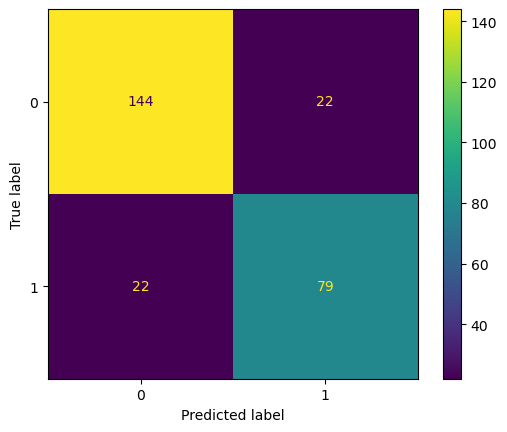

In [46]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(ytest,prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

C:\Users\sivar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


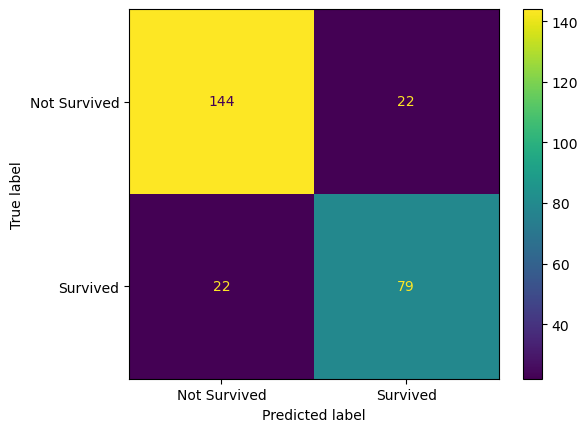

In [47]:
plot_confusion_matrix(model,xtest,ytest,display_labels=['Not Survived','Survived'])

In [48]:
from sklearn.metrics import log_loss
log_loss(ytest,prediction)

5.691849260372789

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,prediction) # Will round

0.8352059925093633

In [50]:
from sklearn.metrics import f1_score
f1_score(ytest,prediction)

0.7821782178217822

In [51]:
model.predict_proba(xtest) # Probobility of each column

array([[0.25041739, 0.74958261],
       [0.36389594, 0.63610406],
       [0.9419008 , 0.0580992 ],
       [0.26117903, 0.73882097],
       [0.94045641, 0.05954359],
       [0.16740608, 0.83259392],
       [0.35139394, 0.64860606],
       [0.53905259, 0.46094741],
       [0.77805914, 0.22194086],
       [0.4224135 , 0.5775865 ],
       [0.75817061, 0.24182939],
       [0.22169942, 0.77830058],
       [0.72381665, 0.27618335],
       [0.14174874, 0.85825126],
       [0.86121744, 0.13878256],
       [0.385757  , 0.614243  ],
       [0.88195667, 0.11804333],
       [0.27915381, 0.72084619],
       [0.21998122, 0.78001878],
       [0.41819084, 0.58180916],
       [0.88877015, 0.11122985],
       [0.59541433, 0.40458567],
       [0.83499213, 0.16500787],
       [0.93394089, 0.06605911],
       [0.52444358, 0.47555642],
       [0.52233101, 0.47766899],
       [0.04697217, 0.95302783],
       [0.86520172, 0.13479828],
       [0.89711598, 0.10288402],
       [0.33128788, 0.66871212],
       [0.